## Get data from HW repo

In [2]:
import pandas as pd
import zipfile
import os
import urllib
import numpy as np
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
zip_num = pd.Series(list(range(0,15)) + list(range(94,100))).astype(str).str.zfill(2)
zip_num
    

0     00
1     01
2     02
3     03
4     04
5     05
6     06
7     07
8     08
9     09
10    10
11    11
12    12
13    13
14    14
15    94
16    95
17    96
18    97
19    98
20    99
dtype: object

In [4]:
csb = pd.DataFrame()

for i in range(len(zip_num)):
    url = 'https://github.com/fedhere/PUI2018_fb55/blob/master/HW12_fb55/zbp' + zip_num[i] + 'totals.zip?raw=true'
    urllib.request.urlretrieve(url, 'file.gz')
    !mv file.gz $PUIDATA
    zip_ref = zipfile.ZipFile('%s/file.gz' %os.getenv('PUIDATA'))
    zip_ref.extractall(os.getenv('PUIDATA'))
    zip_ref.close()
    data = pd.read_csv(os.getenv('PUIDATA') + '/zbp' + zip_num[i] + 'totals.txt', dtype='object')
    data['YEAR'] = zip_num[i]
    csb = pd.concat([csb, data], axis=0)
    

csb.head()
    

,AP,EMP,EMPFLAG,EST,NAME,QP1,YEAR,ZIP,ap,ap_nf,...,cty_name,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,zip
0,0,0,A,1,"HOLTSVILLE, NY",0,00,00501,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,259661,8042,NaN,493,"AGAWAM, MA",59833,00,01001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,169658,6547,NaN,563,"AMHERST, MA",36719,00,01002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2482,82,NaN,13,"AMHERST, MA",308,00,01003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5826,717,NaN,48,"AMHERST, MA",2049,00,01004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
code_to_year = {'00': 2000,'01': 2001, '02': 2002, '03': 2003, '04': 2004, '05': 2005, '06': 2006, '07': 2007, '08': 2008, '09': 2009, '10': 2010, '11': 2011, '12': 2012, '13': 2013, '14': 2014, '15': 2015, '94': 1994, '95': 1995, '96': 1996, '97': 1997, '98': 1998, '99': 1999 }
csb['YEAR'] = csb['YEAR'].map(code_to_year)
csb

,AP,EMP,EMPFLAG,EST,NAME,QP1,YEAR,ZIP,ap,ap_nf,...,cty_name,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,zip
0,0,0,A,1,"HOLTSVILLE, NY",0,2000,00501,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,259661,8042,NaN,493,"AGAWAM, MA",59833,2000,01001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,169658,6547,NaN,563,"AMHERST, MA",36719,2000,01002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2482,82,NaN,13,"AMHERST, MA",308,2000,01003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5826,717,NaN,48,"AMHERST, MA",2049,2000,01004,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20413,764,NaN,86,"BARRE, MA",4470,2000,01005,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31639,1406,NaN,219,"BELCHERTOWN, MA",7305,2000,01007,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3660,221,NaN,21,"BLANDFORD, MA",875,2000,01008,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6515,154,NaN,17,"BONDSVILLE, MA",1238,2000,01009,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9691,404,NaN,73,"BRIMFIELD, MA",2180,2000,01010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csb['ZIP'] = csb.ZIP.fillna(csb['zip'])
csb['NAME'] = csb.NAME.fillna(csb['name'])
csb['EMP'] = csb.EMP.fillna(csb['emp'])
csb['EMPFLAG'] = csb.EMPFLAG.fillna(csb['empflag'])
csb['EST'] = csb.EST.fillna(csb['est'])
csb['NAME'] = csb.NAME.fillna(csb['name'])
csb['QP1'] = csb.QP1.fillna(csb['qp1'])
csb['AP'] = csb.AP.fillna(csb['ap'])
csb_final = csb[['ZIP', 'EST', 'YEAR']]
csb_final.EST = csb_final.EST.astype('int')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
csb_gb = csb_final.groupby(['ZIP', 'YEAR'])['EST'].sum().unstack().reset_index()
csb_gb.head()

YEAR,ZIP,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,00501,NaN,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1,01000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
3,01002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
4,01003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0


In [8]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', 'zips.gz')

('zips.gz', <http.client.HTTPMessage at 0x7fee0df8cc88>)

In [9]:
!mv zips.gz $PUIDATA

In [10]:
zip_ref = zipfile.ZipFile(os.getenv('PUIDATA') +  '/zips.gz', 'r')
zip_ref.extractall(os.getenv('PUIDATA'))
zip_ref.close()
nyc_zips_shp = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/ZIP_CODE_040114.shp')
nyc_zips_shp.head()
nyc_zips_shp.crs = from_epsg(4326)

In [11]:
csb_merge = nyc_zips_shp.merge(csb_gb, left_on='ZIPCODE', right_on='ZIP',how='left')
csb_merge.shape

(263, 35)

In [12]:
csb_merge.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [13]:
csb_merge.columns

Index([   'ZIPCODE',    'BLDGZIP',    'PO_NAME', 'POPULATION',       'AREA',
            'STATE',     'COUNTY',    'ST_FIPS',   'CTY_FIPS',        'URL',
       'SHAPE_AREA',  'SHAPE_LEN',   'geometry',        'ZIP',         1994,
               1995,         1996,         1997,         1998,         1999,
               2000,         2001,         2002,         2003,         2004,
               2005,         2006,         2007,         2008,         2009,
               2010,         2011,         2012,         2013,         2014],
      dtype='object')

In [14]:
csb_merge.drop(['BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY',
                'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'ZIP'], inplace=True, axis=1)

In [15]:
csb_merge.columns

Index(['ZIPCODE',      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014],
      dtype='object')

In [16]:
csb_merge.dropna(axis=0, how='any',inplace=True)

In [17]:
csb_merge.index = csb_merge.ZIPCODE
csb_merge.drop('ZIPCODE', inplace=True,axis=1)
csb_merge.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [18]:
cleancsb = csb_merge

In [19]:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T

In [20]:
vals.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.292900,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853
11213,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,-0.058923,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875
11212,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.092169,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464
11225,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,-0.057531,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007
11218,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.120649,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331


At 2 clusters, inertia is 1549.9204448610353
At 3 clusters, inertia is 1344.683388124492
At 4 clusters, inertia is 1171.0024212331177
At 5 clusters, inertia is 1062.958320207538
At 6 clusters, inertia is 984.9423188431342
At 7 clusters, inertia is 922.9180087019728
At 8 clusters, inertia is 880.1266483082038
At 9 clusters, inertia is 834.6144947972878


Text(0.5,1,'Inertia Plot')

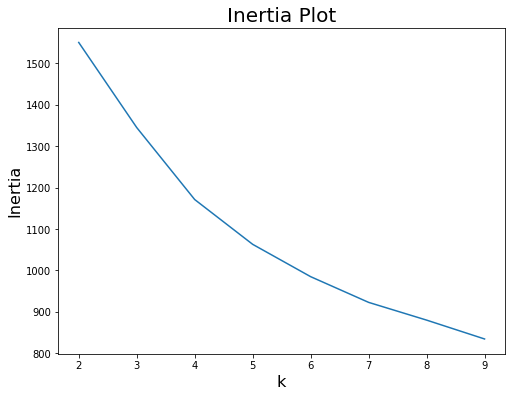

In [21]:
from sklearn.cluster import KMeans
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(vals)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

The Elbow of the Inertia plot is around k = 4 so I will fit the data to four clusters

In [22]:
cluster = KMeans(n_clusters=4, n_init=100)
cluster.fit(vals)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=100,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [23]:
cleancsb['cluster_groups'] = cluster.labels_
cleancsb.cluster_groups.value_counts()

0    178
2     31
3     17
1     17
Name: cluster_groups, dtype: int64

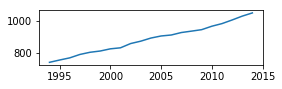

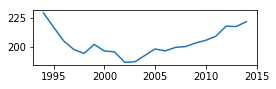

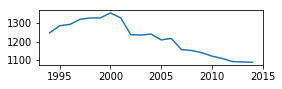

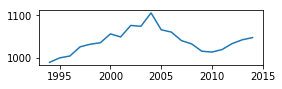

In [25]:
for i in range(4):
    fig = plt.figure(figsize=(4,1))
    ax = fig.add_subplot(111)
    grp = cleancsb[cleancsb['cluster_groups'] == i]
    grp = grp.drop(['cluster_groups'], axis=1)
    ax.plot(grp.mean(axis=0), '-')
    

In [26]:
nyc_zips_shp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [27]:
cleancsb.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,cluster_groups
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,0


In [30]:
cluster_merge = nyc_zips_shp.merge(cleancsb, left_on='ZIPCODE', right_index=True, how='right')

Text(0.5,1,'Clusters of Business Patterns in NYC from 1994-2014')

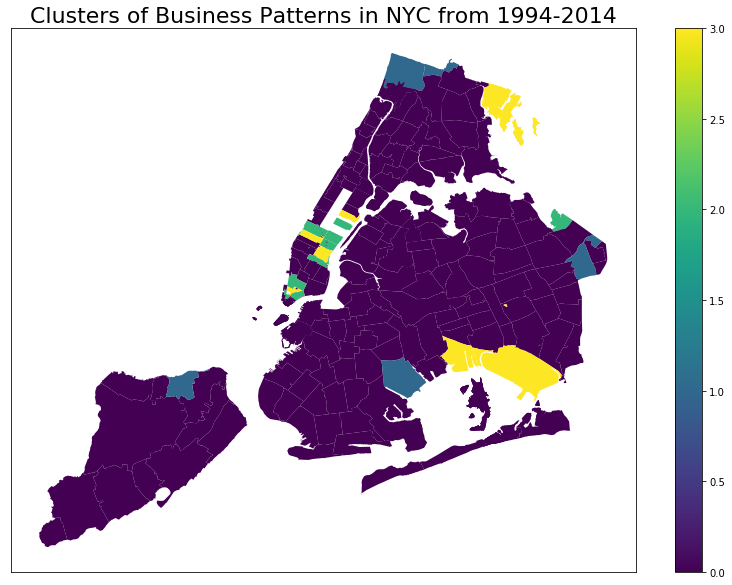

In [35]:
f, ax = plt.subplots(figsize=(14,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
cluster_merge.plot(column='cluster_groups',cmap='viridis',linewidth=0.1,ax=ax, legend=True, k=5)
plt.title("Clusters of Business Patterns in NYC from 1994-2014",fontsize=22)

### Figure 2:
The figure displays the four clusters of business patterns in New York City from 1994-2014. The largest grouping is in purple and has linearly increasing number of businesses over that time span. While the green group has peaks in 2000 and drops after.

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg_cluster = AgglomerativeClustering(4).fit(vals)

In [38]:
agg_cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 0, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 3,
       3, 3, 1, 0, 0, 0, 0, 3, 3, 2, 0, 3, 0])

In [44]:
cleancsb.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,cluster_groups,agg_cluster_labels
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0,0,0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0,0,0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0,0,0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0,0,0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0,0,0


In [50]:
cleancsb = cleancsb.drop('cluster_groups', axis=1)

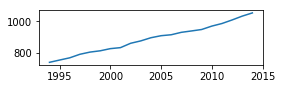

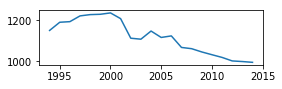

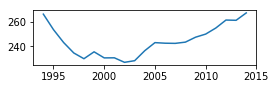

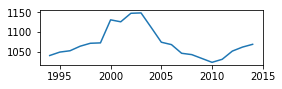

In [51]:
for i in range(4):
    fig = plt.figure(figsize=(4,1))
    ax = fig.add_subplot(111)
    grp = cleancsb[cleancsb['agg_cluster_labels'] == i]
    grp = grp.drop(['agg_cluster_labels'], axis=1)
    ax.plot(grp.mean(axis=0), '-')

### Figure 3:
Group 0 has a linearly increasing trend and has the largest group. This grouping may be larger businesses that absorbed the 2008 Financial Crisis

Group 1 peaks in 2000 and then declines, despite a bump from 2004-2006.

Group 2 declines before 2000 and the ascends for the rest of the data set

Group 3 peaks in the early 2000s and then drops in the latter part of the decade

In [45]:
agg_cluster_merge = nyc_zips_shp.merge(cleancsb, left_on='ZIPCODE', right_index=True, how='right')

Text(0.5,1,'Agglomerative Clusters of Business Patterns in NYC from 1994-2014')

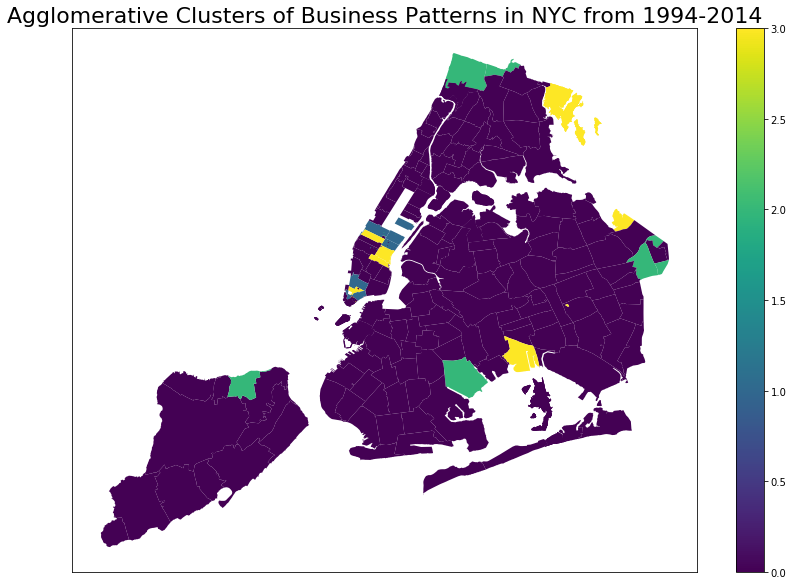

In [47]:
f, ax = plt.subplots(figsize=(14,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
agg_cluster_merge.plot(column='agg_cluster_labels',cmap='viridis',linewidth=0.1,ax=ax, legend=True, k=5)
plt.title("Agglomerative Clusters of Business Patterns in NYC from 1994-2014",fontsize=22)

### Figure 4:
This clustering algorithm delivers the same type of results as K-Means